In [209]:
import re
import os
import json


def parse_input(input_text):
    parts = re.split(r"```json|```", input_text)
    parts = [part.strip() for part in parts if part.strip()]
    return {"id": parts[0], "content": json.loads(parts[-1])}


signs = []
count = 0

for filename in sorted(os.listdir("tmp")):
    with open(f"tmp/{filename}", "r") as f:
        try:
            filecontent = f.read()
            signs.append(parse_input(filecontent))
        except Exception as e:
            count += 1
            print(filename)

print(count, len(signs))

0 13083


In [210]:
import json


count = {}
count_length = {}
sign_groups = {}


def create_index(
    index_list_to_use,
    hand,
    shape,
    hand_orientation,
    palm_orientation,
    fingers_orientation,
    location,
    movement,
):
    index = hand + "("

    if "shape" in index_list_to_use:
        index += f"{shape},"

    if "hand_orientation" in index_list_to_use:
        index += f"{hand_orientation},"

    if "palm_orientation" in index_list_to_use:
        index += f"{palm_orientation},"

    if "fingers_orientation" in index_list_to_use:
        index += f"{fingers_orientation},"

    if "location" in index_list_to_use:
        index += f"{location},"

    if "movement" in index_list_to_use:
        index += f"{movement},"

    return index + ")"


def parse_signs(index_list_to_use, length):
    for sign in signs:
        try:
            content = sign["content"]
            indexes = ""
            count_length[len(content)] = count_length.get(len(content), 0) + 1
            for c in content[:length]:
                shape = c.get("right", {}).get("shape", "default")
                hand_orientation = c.get("right", {}).get("hand_orientation", "any")
                palm_orientation = c.get("right", {}).get("palm_orientation", "default")
                fingers_orientation = c.get("right", {}).get(
                    "fingers_orientation", "any"
                )
                location = c.get("right", {}).get("location", "chest")
                right_movement = c.get("right", {}).get("movement", [])
                movement = len(right_movement) > 0 and right_movement[0] or "nil"

                shape_left = c.get("left", {}).get("shape", "default")
                hand_orientation_left = c.get("left", {}).get("hand_orientation", "any")
                palm_orientation_left = c.get("left", {}).get(
                    "palm_orientation", "default"
                )
                fingers_orientation_left = c.get("left", {}).get(
                    "fingers_orientation", "any"
                )
                location_left = c.get("left", {}).get("location", "default")
                left_movement = c.get("left", {}).get("movement", [])
                movement_left = len(left_movement) > 0 and left_movement[0] or "nil"

                index_right = create_index(
                    index_list_to_use,
                    "r",
                    shape,
                    hand_orientation,
                    palm_orientation,
                    fingers_orientation,
                    location,
                    movement,
                )
                index_left = create_index(
                    index_list_to_use,
                    "l",
                    shape_left,
                    hand_orientation_left,
                    palm_orientation_left,
                    fingers_orientation_left,
                    location_left,
                    movement_left,
                )
                indexes += index_right + index_left

            count[indexes] = count.get(indexes, 0) + 1

            if indexes not in sign_groups:
                sign_groups[indexes] = [sign]
            else:
                sign_groups[indexes].append(sign)
        except Exception as e:
            print(sign, e)


parse_signs(
    [
        "shape",
        "hand_orientation",
        "palm_orientation",
        "fingers_orientation",
        "location",
        "movement",
    ],
    4,
)

In [211]:

counter = 0
total = 0

for k, v in sorted(count.items(), key=lambda item: item[1], reverse=True):
    print(k, v)
    if v == 1:
        counter += 1
    total += v

print(counter, total)

r(5,any,left,any,chest,front,)l(5,any,right,any,default,front,) 19
r(1,any,down,any,chest,right,)l(1,any,down,any,chest,left,) 18
r(open_united,horizontal,back,any,chest_left,right,)l(default,any,default,any,default,nil,)r(open_united,horizontal,back,any,chest_right,nil,)l(default,any,default,any,default,nil,) 17
r(1,any,down,front,wrist,front,)l(open,horizontal,right,any,default,nil,) 16
r(X,any,left,any,index,nil,)l(X,any,back,any,default,nil,) 14
r(closed_thumb_distend,horizontal,back,any,shoulder_right,front,)l(default,any,default,any,default,nil,) 13
r(open_thumb_middle_united,any,down,any,hand_above,down,)l(open,any,up,any,default,nil,) 13
r(L,any,left,any,chin,index_left,)l(default,any,default,any,default,nil,) 13
r(U,any,back,any,mouth,front,)l(default,any,default,any,default,nil,) 12
r(open_thumb_index_united,any,down,any,chest,front,)l(open_thumb_index_united,any,down,any,default,front,) 11
r(Y,any,left,any,mouth,front,)l(default,any,default,any,default,nil,) 11
r(open_thumb_

In [212]:
group = (
    "r(5,any,left,any,chest,front,)l(5,any,right,any,default,front,)"
)

print(
    json.dumps(
        sign_groups[group],
        ensure_ascii=False,
        indent=4,
    )
)

[
    {
        "id": "TREM (5) (sinal usado em: RJ, CE): Idem TREM (1). (Mãos em 5, palma a palma, próximas uma à outra. Movê-las para frente com força, duas vezes.)trem",
        "content": [
            {
                "right": {
                    "shape": "5",
                    "palm_orientation": "left",
                    "movement": [
                        "front",
                        "back",
                        "front"
                    ]
                },
                "left": {
                    "shape": "5",
                    "palm_orientation": "right",
                    "movement": [
                        "front",
                        "back",
                        "front"
                    ]
                }
            }
        ]
    },
    {
        "id": "TREM BALA (sinal usado em: SP) (Inglês: high-speed rail): s.m. Transporte público que circula em caminhos de ferro excedendo os 250 km/h. Ex.: Ninguém fica indiferente diante de u

In [207]:
from PIL import Image
import os


def find_text_image(text):
    for text_path in sorted(os.listdir("raw_texts")):
        if text in open(f"raw_texts/{text_path}", "r").read():
            return text_path


def open_image(image_path):
    try:
        img = Image.open(image_path)
        img.show()
    except IOError:
        print(
            "Error: Unable to open image. Make sure the path is correct and you have permission to access the file."
        )


founded_path = find_text_image("DOENÇA (")
image_path = f"images/{founded_path.replace('.txt', '')}.png"

open_image(image_path)

default 9712
open 5428
1 2436
S 1728
A 1337
C 1140
L 1139
open_separated 1033
open_curved_separated 985
open_united 859
5 848
closed 755
V 754
open_thumb_index_united 638
B 610
X 528
U 523
O 484
D 478
open_curved 450
Y 434
P 360
closed_thumb_distend 350
closed_thumb_index_distend 330
R 278
closed_thumb_index_united 273
closed_thumb_index_curved 257
open_flexed 247
4 241
F 233
M 223
A_index_highlighted 212
I 207
open_inclined 163
E 158
open_curved_united 157
closed_thumb_index_distend_curved 139
3 134
N 117
T 112
open_thumb_middle_united 110
G 110
open_bent 110
2 103
closed_index_pinky_distend 101
closed_thumb_index_middle_distend 85
J 77
open_thumb_distend 75
open_8 68
open_middle_flexed 65
W 57
H 57
open_flexed_thumb_parallel 57
open_united_curved 51
curved 40
6 34
open_almost_united 33
open_thumb 31
U_thumb_distend 30
open_thumb_index_curved 29
closed_thumb_index_C 26
open_middle_curved 25
closed_thumb_index_middle 25
open_b 24
closed_thumb_highlighted 23
closed_thumb_index_middle_un

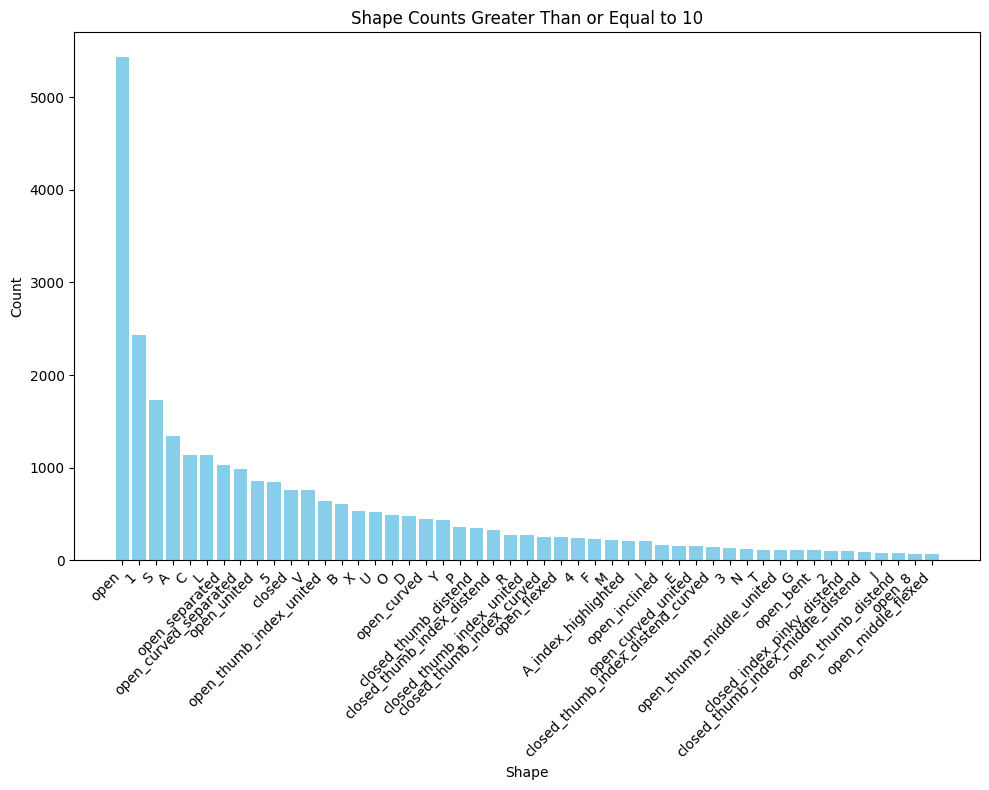

In [219]:
import matplotlib.pyplot as plt

shape_counter = {}

for sign in signs:
    try:
        for content in sign["content"][:4]:
            shape = content.get("right", {}).get("shape", "default")
            shape_counter[shape] = shape_counter.get(shape, 0) + 1

            shape_left = content.get("left", {}).get("shape", "default")
            shape_counter[shape_left] = shape_counter.get(shape_left, 0) + 1
    except:
        print(sign)

for k, v in sorted(shape_counter.items(), key=lambda item: item[1], reverse=True):
    print(k, v)
    
filtered_shape_counter = {shape: count for shape, count in shape_counter.items() if count >= 10}

sorted_shapes = sorted(filtered_shape_counter.items(), key=lambda item: item[1], reverse=True)[1:50]

shapes, counts = zip(*sorted_shapes)

plt.figure(figsize=(10, 8))
plt.bar(shapes, counts, color='skyblue')
plt.xlabel('Shape')
plt.ylabel('Count')
plt.title('Shape Counts Greater Than or Equal to 10')
plt.xticks(rotation=45, ha="right") 
plt.tight_layout()  
plt.show()

default 24694
hand 2361
chest 1853
mouth 962
forehead 755
head_side 566
shoulder 447
hand_above 447
chin 418
head 418
index 405
face 335
palm 329
shoulder_right 311
wrist 293
nose 283
eye 225
chest_left 220
elbow 218
shoulder_left 207
cheek 200
abdomen 188
neck 183
hand_behind 169
waist 138
arm 119
side 118
forehead_right 111
face_side 100
head_side_right 100
forearm 98
chest_right 89
ear 85
eye_right 83
side_right 80
hand_below 75
lips 66
thumb 64
cheek_right 57
head_right 52
hand_front 51
hand_top 48
hip 48
hand_side 47
pinky 39
side_left 38
temples 38
forehead_left 37
mouth_right 37
neck_left 34
neck_right 30
thigh 28
ear_right 27
arm_left 24
waist_left 24
ring 22
waist_right 20
pelvic 20
chin_right 19
stomach 18
armpit 18
teeth 16
face_side_right 15
hand_back 15
mouth_left 15
pelvis 14
hand_left 12
hip_right 12
head_left 11
elbow_left 11
mustache 10
eye_left 10
nose_right 9
face_right 9
cheek_left 9
arm_upper_left 9
head_side_left 9
arm_upper 9
hip_left 9
tongue 9
fingertips 9
thro

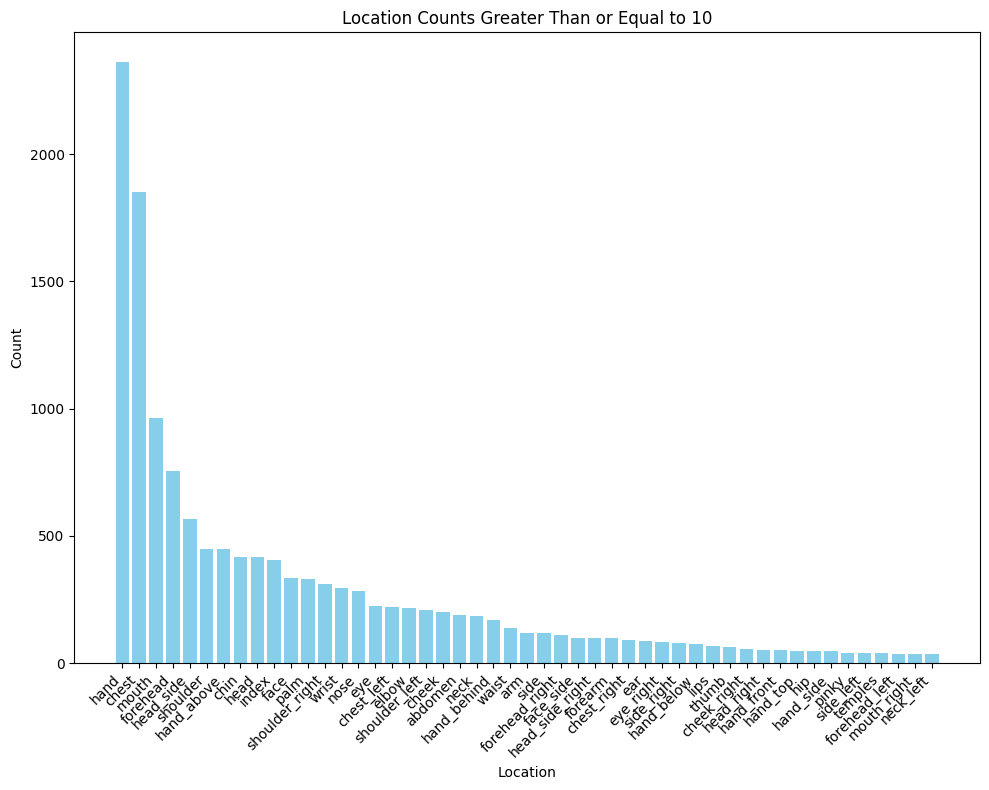

In [221]:
location_counter = {}

for sign in signs:
    try:
        for content in sign["content"][:4]:
            location = content.get("right", {}).get("location", "default")
            location_counter[location] = location_counter.get(location, 0) + 1

            location_left = content.get("left", {}).get("location", "default")
            location_counter[location_left] = location_counter.get(location_left, 0) + 1
    except:
        print(sign)

for k, v in sorted(location_counter.items(), key=lambda item: item[1], reverse=True):
    print(k, v)

filtered_location_counter = {
    location: count for location, count in location_counter.items() if count >= 10
}

sorted_locations = sorted(
    filtered_location_counter.items(), key=lambda item: item[1], reverse=True
)[1:50]

locations, counts = zip(*sorted_locations)

plt.figure(figsize=(10, 8))
plt.bar(locations, counts, color="skyblue")
plt.xlabel("Location")
plt.ylabel("Count")
plt.title("Location Counts Greater Than or Equal to 10")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

any 27893
horizontal 7128
vertical 4018
inverted 58
diagonal 8
left 7
front 7
down 3
VERTICAL 2
L 2
CL 2
middle 1
H 1
5 1
invert 1
1 1
back 1
2 1
S 1


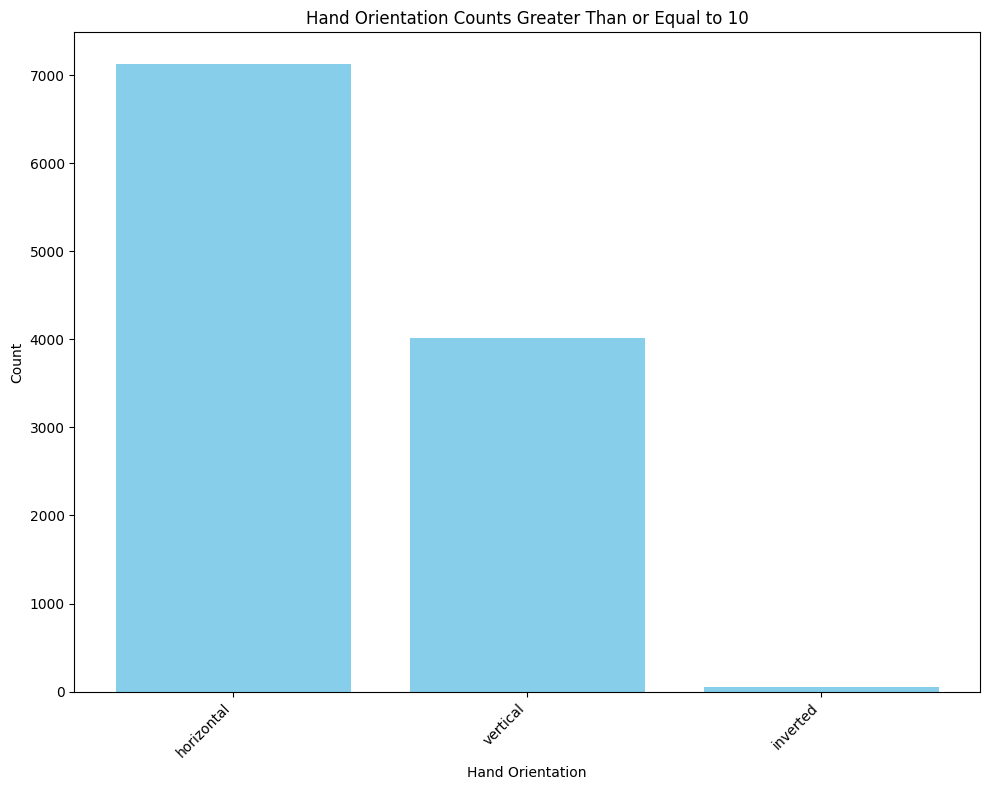

In [222]:
hand_orientation = {}

for sign in signs:
    try:
        for content in sign["content"][:4]:
            hand_orientation_right = content.get("right", {}).get(
                "hand_orientation", "any"
            )
            hand_orientation[hand_orientation_right] = (
                hand_orientation.get(hand_orientation_right, 0) + 1
            )

            hand_orientation_left = content.get("left", {}).get(
                "hand_orientation", "any"
            )
            hand_orientation[hand_orientation_left] = (
                hand_orientation.get(hand_orientation_left, 0) + 1
            )
    except:
        print(sign)

for k, v in sorted(hand_orientation.items(), key=lambda item: item[1], reverse=True):
    print(k, v)

filtered_hand_orientation = {
    orientation: count for orientation, count in hand_orientation.items() if count >= 10
}

sorted_hand_orientation = sorted(
    filtered_hand_orientation.items(), key=lambda item: item[1], reverse=True
)[1:50]

orientations, counts = zip(*sorted_hand_orientation)

plt.figure(figsize=(10, 8))
plt.bar(orientations, counts, color="skyblue")
plt.xlabel("Hand Orientation")
plt.ylabel("Count")
plt.title("Hand Orientation Counts Greater Than or Equal to 10")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

{'id': 'MAÇÃ-VERDE (sinal usado em: CE) (Inglês: green apple): S. f. Fruto da macieira. Árvore da família das rosáceas, nativa da Europa e da Ásia, de folhas alternas e ovais, flores actinomorfas e frutos comestíveis; é planta melífera e apresenta con esverdeada. Ex.: É difícil encontrar maçã-verde barata nesta época do ano. (Fazer este sinal VERDE: Mão esquerda em S, palma para baixo; mão direita em V, palma para baixo. Passar a palma dos dedos direitos para a esquerda e para a direita, sobre o dorso da mão esquerda, duas vezes. Em seguida fazer este sinal MAÇÃ: Mão em C horizontal, palma para trás, diante da boca. Girar a palma para cima.)macaxeira', 'content': [{'right': {'shape': 'V', 'palm_orientation': 'down', 'location': 'hand', 'movement': ['left', 'right', 'left', 'right']}, 'left': {'shape': 'S', 'palm_orientation': 'down'}}, {'right': {'shape': 'C', 'hand_orientation': 'horizontal', 'palm_orientation': ['back', 'up'], 'location': 'mouth'}}]}
any 10143
down 6668
back 6486
lef

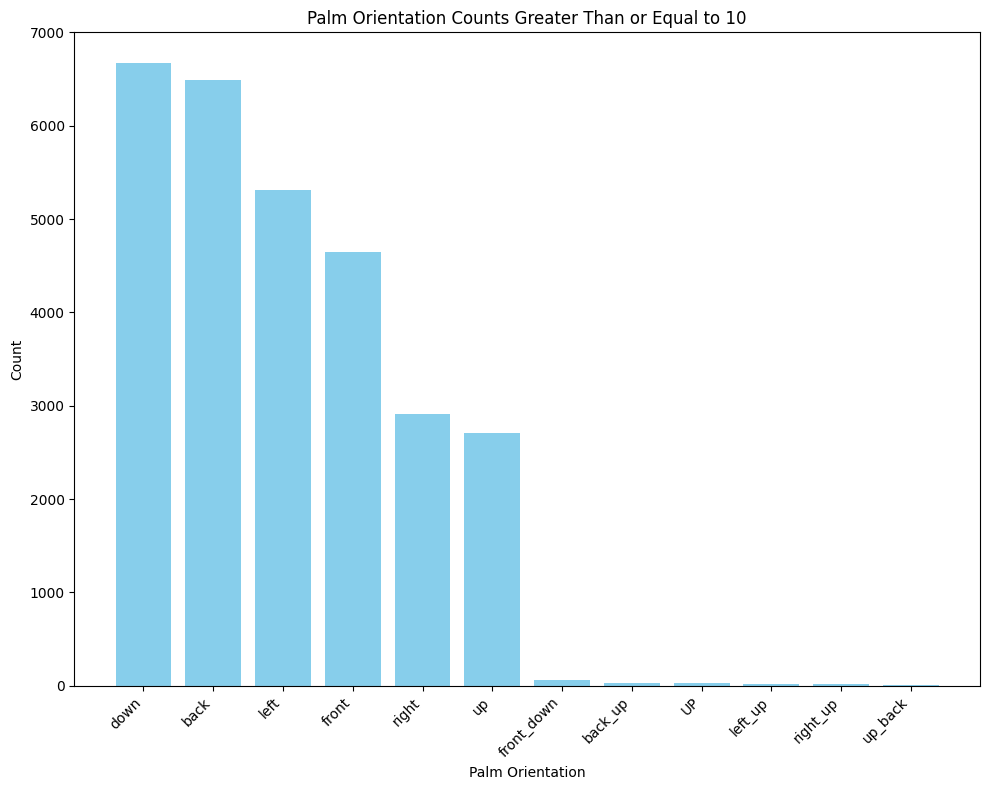

In [223]:
palm_orientation = {}

for sign in signs:
    try:
        for content in sign["content"][:4]:
            palm_orientation_right = content.get("right", {}).get(
                "palm_orientation", "any"
            )
            palm_orientation[palm_orientation_right] = (
                palm_orientation.get(palm_orientation_right, 0) + 1
            )

            palm_orientation_left = content.get("left", {}).get(
                "palm_orientation", "any"
            )
            palm_orientation[palm_orientation_left] = (
                palm_orientation.get(palm_orientation_left, 0) + 1
            )
    except:
        print(sign)

for k, v in sorted(palm_orientation.items(), key=lambda item: item[1], reverse=True):
    print(k, v)

filtered_palm_orientation = {
    orientation: count for orientation, count in palm_orientation.items() if count >= 10
}

sorted_palm_orientation = sorted(
    filtered_palm_orientation.items(), key=lambda item: item[1], reverse=True
)[1:50]

orientations, counts = zip(*sorted_palm_orientation)

plt.figure(figsize=(10, 8))
plt.bar(orientations, counts, color="skyblue")
plt.xlabel("Palm Orientation")
plt.ylabel("Count")
plt.title("Palm Orientation Counts Greater Than or Equal to 10")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

any 36121
front 795
right 686
left 670
down 529
up 204
back 47
horizontal 19
down_left 16
down_right 10
curved 7
vertical 4
RIGHT 4
front_curved 3
curved_separated 2
up_left 2
middle 2
FRONT 2
LEFT 2
left_separated 2
right_separated 2
spread 1
right_diagonal 1
left_diagonal 1
out 1
up_right 1
front_down 1
left_down 1


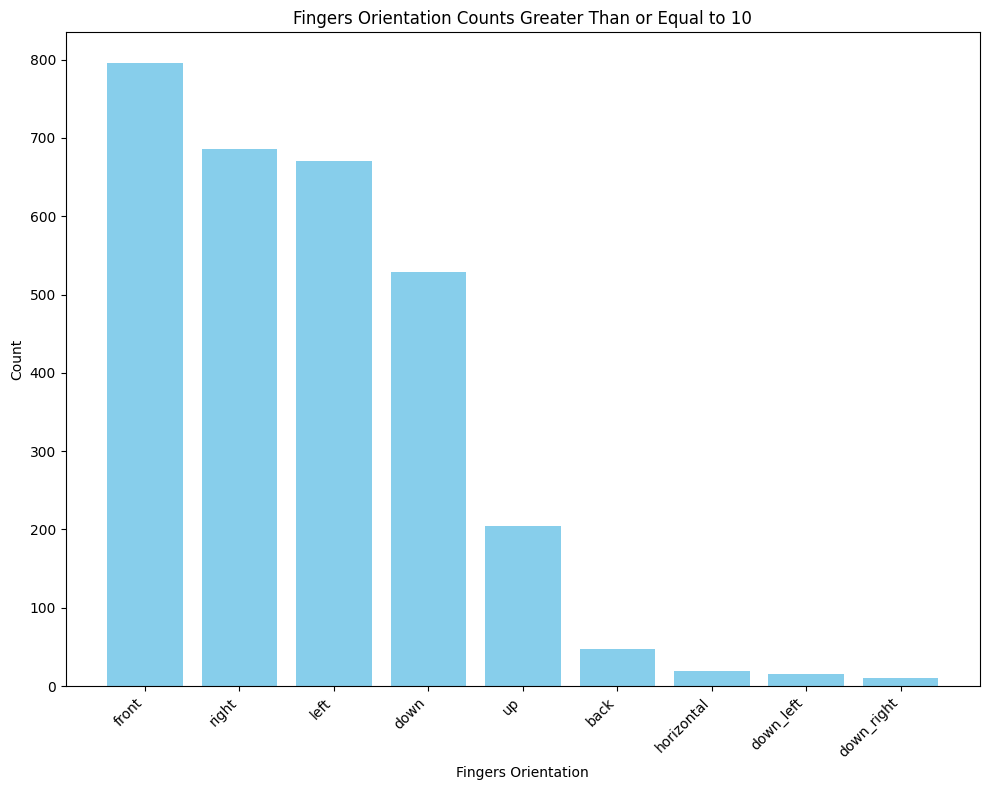

In [224]:
fingers_orientation = {}

for sign in signs:
    try:
        for content in sign["content"][:4]:
            fingers_orientation_right = content.get("right", {}).get(
                "fingers_orientation", "any"
            )
            fingers_orientation[fingers_orientation_right] = (
                fingers_orientation.get(fingers_orientation_right, 0) + 1
            )

            fingers_orientation_left = content.get("left", {}).get(
                "fingers_orientation", "any"
            )
            fingers_orientation[fingers_orientation_left] = (
                fingers_orientation.get(fingers_orientation_left, 0) + 1
            )
    except:
        print(sign)

for k, v in sorted(fingers_orientation.items(), key=lambda item: item[1], reverse=True):
    print(k, v)

filtered_fingers_orientation = {
    orientation: count
    for orientation, count in fingers_orientation.items()
    if count >= 10
}

sorted_fingers_orientation = sorted(
    filtered_fingers_orientation.items(), key=lambda item: item[1], reverse=True
)[1:50]

orientations, counts = zip(*sorted_fingers_orientation)

plt.figure(figsize=(10, 8))
plt.bar(orientations, counts, color="skyblue")
plt.xlabel("Fingers Orientation")
plt.ylabel("Count")
plt.title("Fingers Orientation Counts Greater Than or Equal to 10")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

In [172]:
movement_counter = {}

for sign in signs:
    try:
        for content in sign["content"][:4]:
            right_movement = content.get("right", {}).get("movement", [])
            movement = len(right_movement) > 0 and right_movement[0] or "nil"
            movement_counter[movement] = movement_counter.get(movement, 0) + 1

            left_movement = content.get("left", {}).get("movement", [])
            movement_left = len(left_movement) > 0 and left_movement[0] or "nil"
            movement_counter[movement_left] = movement_counter.get(movement_left, 0) + 1
    except:
        print(sign)

for k, v in sorted(movement_counter.items(), key=lambda item: item[1], reverse=True):
    print(k, v)

filtered_movement_counter = {
    movement: count for movement, count in movement_counter.items() if count >= 10
}

sorted_movement = sorted(
    filtered_movement_counter.items(), key=lambda item: item[1], reverse=True
)[1:50]

movements, counts = zip(*sorted_movement)

plt.figure(figsize=(10, 8))
plt.bar(movements, counts, color="skyblue")
plt.xlabel("Movement")
plt.ylabel("Count")
plt.title("Movement Counts Greater Than or Equal to 10")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

{'id': 'LOCAL DE ARTICULAÇÃO (ponto de articulação) (sinal usado em: SP) (Inglês: place of sign articulation, sign articulation site, spot or locality where a sign is articulated): S. m. Ponto no espaço da sinalização onde o sinal é articulado. O local de articulação é um dos princípios e parâmetros formacionais da estrutura sublexical dos sinais de uma língua de sinais (ao lado de orientação da palma, movimento, configuração de mãos, e expressão facial). local de articulação consiste no ponto do espaço da sinalização onde o sinal é articulado, podendo ser em frente ao peito ou do abdome, num ou noutro ombro, na altura do pescoço, do queixo, da boca, do nariz, do olho, da testa, ou acima da cabeça, e tanto no centro quanto no lado esquerdo ou direito. Ex.: No sinal BRASIL, o local de articulação da mão em B é na altura da cabeça. (Mão esquerda em 1, palma para a direita; mão direita em 1, palma para baixo, indicador para frente, tocando a ponta do indicador esquerdo. Mover a mão direit